# MNIST multilayer network

## Exercise - Load and preprocess data

> **Exercise**: Load the MNIST data. Split it into train, validation and test sets. Standardize the images. Define a `get_batches(X, y, batch_size)` function to generate random X/y batches of size `batch_size` using a Python generator.

In [75]:
# define which xk.npz file to load (give the number of k)
number_of_k=60
data_filename='mnist-{}k.npz'.format(number_of_k)
print('Using file:',data_filename)

Using file: mnist-60k.npz


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt

from datetime import datetime


In [84]:
# Load data
with np.load(data_filename, allow_pickle=False) as npz_file:
    # Load items into a dictionary
    mnist = dict(npz_file.items())

In [85]:
# Create train, test and validation sets
X_train, X_test, y_train, y_test = train_test_split(
    # Convert uint8 pixel values to float
    mnist['data'].astype(np.float32),
    mnist['labels'],
    test_size=2000, random_state=0)

X_test, X_valid, y_test, y_valid = train_test_split(
    # Convert uint8 pixel values to float
    X_test,
    y_test,
    test_size=1000, random_state=0)

print("Train:", X_train.shape, y_train.shape)
print("Test :", X_test.shape, y_test.shape)
print("Valid:", X_valid.shape, y_valid.shape)

# Rescale train and validation data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)



Train: (58000, 784) (58000,)
Test : (1000, 784) (1000,)
Valid: (1000, 784) (1000,)


In [86]:
# Batch generator
def get_batches(X, y, batch_size):
    # Shuffle X,y
    shuffled_idx = np.arange(len(y)) # 1,2,...,n
    np.random.shuffle(shuffled_idx)

    # Enumerate indexes by steps of batch_size
    # i: 0, b, 2b, 3b, 4b, .. where b is the batch size
    for i in range(0, len(y), batch_size):
        # Batch indexes
        batch_idx = shuffled_idx[i:i+batch_size]
        yield X[batch_idx], y[batch_idx]

## Exercise - Create and train a multilayer network

> **Exercise:** Create a multilayer neural network and train it using your batch generator. Evaluate the accuracy on the validation set after each epoch. Test different architectures and parameters. Evaluate your best network on the test set. Save the trained weights of the first fully connected layer in a variable.

In [87]:
hidden_layer_1_nb_neurons=64
hidden_layer_2_nb_neurons=0

# Redefine the graph
graph = tf.Graph()

with graph.as_default():
    # Create placeholders
    X = tf.placeholder(dtype=tf.float32, shape=[None, 784])
    y = tf.placeholder(dtype=tf.int32, shape=[None])

    # Hidden layer with 16 units
    hidden_1 = tf.layers.dense(
        X, hidden_layer_1_nb_neurons, activation=tf.nn.relu, # ReLU
        kernel_initializer=tf.variance_scaling_initializer(scale=2, seed=0),
        bias_initializer=tf.zeros_initializer(),
        name='hidden_1'
    )

    if(hidden_layer_2_nb_neurons > 0):
        # Hidden layer with 16 units
        hidden_2 = tf.layers.dense(
            hidden_1, hidden_layer_2_nb_neurons, activation=tf.nn.relu, # ReLU
            kernel_initializer=tf.variance_scaling_initializer(scale=2, seed=0),
            bias_initializer=tf.zeros_initializer(),
            name='hidden_2'
        )
    else:
        hidden_2=hidden_1

    # Output layer
    logits = tf.layers.dense(
        hidden_2, 10, activation=None, # No activation function
        kernel_initializer=tf.variance_scaling_initializer(scale=1, seed=0),
        bias_initializer=tf.zeros_initializer(),
        name='output'
    )
    
    print("  Trainable Variables:")
    for v in tf.trainable_variables():
        print("   ",v)

    # Loss fuction: mean cross-entropy
    mean_ce = tf.reduce_mean(
        tf.nn.sparse_softmax_cross_entropy_with_logits(
            labels=y, logits=logits))

    # Gradient descent
    lr = tf.placeholder(dtype=tf.float32)
    gd = tf.train.GradientDescentOptimizer(learning_rate=lr)

    # Minimize cross-entropy
    train_op = gd.minimize(mean_ce)

    # Compute predictions and accuracy
    predictions = tf.argmax(logits, axis=1, output_type=tf.int32)
    is_correct = tf.equal(y, predictions)
    accuracy = tf.reduce_mean(tf.cast(is_correct, dtype=tf.float32))
    

  Trainable Variables:
    <tf.Variable 'hidden_1/kernel:0' shape=(784, 64) dtype=float32_ref>
    <tf.Variable 'hidden_1/bias:0' shape=(64,) dtype=float32_ref>
    <tf.Variable 'output/kernel:0' shape=(64, 10) dtype=float32_ref>
    <tf.Variable 'output/bias:0' shape=(10,) dtype=float32_ref>


Epoch 1 - valid: 0.899 train: 0.824 (mean)
Epoch 2 - valid: 0.923 train: 0.914 (mean)
Epoch 3 - valid: 0.933 train: 0.927 (mean)
Epoch 4 - valid: 0.938 train: 0.937 (mean)
Epoch 5 - valid: 0.941 train: 0.943 (mean)
Epoch 6 - valid: 0.943 train: 0.949 (mean)
Epoch 7 - valid: 0.942 train: 0.953 (mean)
Epoch 8 - valid: 0.944 train: 0.956 (mean)
Epoch 9 - valid: 0.948 train: 0.959 (mean)
Epoch 10 - valid: 0.951 train: 0.961 (mean)
Epoch 11 - valid: 0.951 train: 0.963 (mean)
Epoch 12 - valid: 0.956 train: 0.965 (mean)
Epoch 13 - valid: 0.954 train: 0.967 (mean)
Epoch 14 - valid: 0.957 train: 0.968 (mean)
Epoch 15 - valid: 0.957 train: 0.969 (mean)
Epoch 16 - valid: 0.956 train: 0.971 (mean)
Epoch 17 - valid: 0.957 train: 0.972 (mean)
Epoch 18 - valid: 0.959 train: 0.973 (mean)
Epoch 19 - valid: 0.960 train: 0.974 (mean)
Epoch 20 - valid: 0.958 train: 0.975 (mean)
Epoch 21 - valid: 0.960 train: 0.976 (mean)
Epoch 22 - valid: 0.958 train: 0.977 (mean)
Epoch 23 - valid: 0.956 train: 0.978 (mea

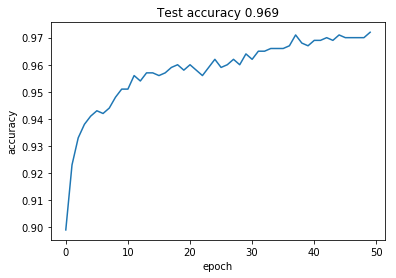

In [88]:
start_time = datetime.now()

# Validation accuracy
valid_acc_values = []

with tf.Session(graph=graph) as sess:
    # Initialize variables
    sess.run(tf.global_variables_initializer())

    # Set seed
    np.random.seed(0)

    # Train several epochs
    for epoch in range(50):
        # Accuracy values (train) after each batch
        batch_acc = []

        # Get batches of data
        for X_batch, y_batch in get_batches(X_train, y_train, 64):
            # Run training and evaluate accuracy
            _, acc_value = sess.run([train_op, accuracy], feed_dict={
                X: X_batch,
                y: y_batch,
                lr: 0.01 # Learning rate
            })

            # Save accuracy (current batch)
            batch_acc.append(acc_value)

        # Evaluate validation accuracy
        valid_acc = sess.run(accuracy, feed_dict={
            X: X_valid,
            y: y_valid
        })
        valid_acc_values.append(valid_acc)

        # Print progress
        print('Epoch {} - valid: {:.3f} train: {:.3f} (mean)'.format(
            epoch+1, valid_acc, np.mean(batch_acc)
        ))

    elapsed_time = datetime.now() - start_time
    print("Elapsed Time:", elapsed_time)

    # Get weights/biases of the hidden layer
    with tf.variable_scope('hidden_1', reuse=True):
        W1 = tf.get_variable('kernel')
        b1 = tf.get_variable('bias')

    # Get weights/biases of the output layer
    with tf.variable_scope('output', reuse=True):
        W2 = tf.get_variable('kernel')
        b2 = tf.get_variable('bias')

    # Evaluate test accuracy
    test_acc = sess.run(accuracy, feed_dict={
        X: X_test,
        y: y_test
    })
        
    # Weights of the hidden and output layers
    weights_hidden = W1.eval()
    weights_output = W2.eval()

    # Plot accuracy values
    plt.plot(valid_acc_values)
    plt.title('Test accuracy {:.3f}'.format(test_acc))
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.show()


## Exercise - Visualize weights

> **Exercise**: Plot the weights from the first fully connected layer (the templates) with the `imshow()` function.

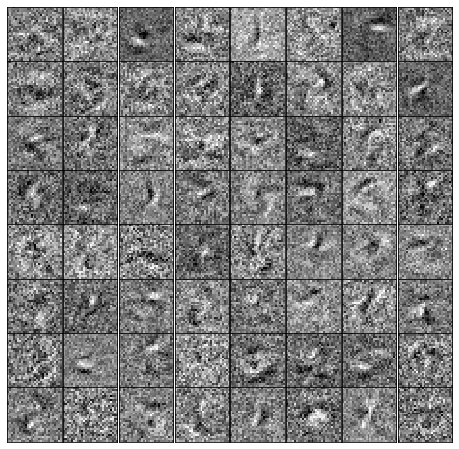

In [89]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(8, 8))

# Remove gaps between suplots
plt.subplots_adjust(wspace=0, hspace=0)

# Plot the weights of the 64 hidden units
for i, axis in enumerate(axes.flatten()):
    # Get weights of i-th hidden unit
    weights = weights_hidden[:, i]
    
    # Reshape into 28 by 28 array
    weights = weights.reshape(28, 28)
    
    # Plot weights
    axis.imshow(weights, cmap=plt.cm.gray_r) # Grayscale
    axis.get_xaxis().set_visible(False) # Disable x-axis
    axis.get_yaxis().set_visible(False) # Disable y-axis
    
plt.show()